In [1]:
import nltk

## Simple sentiment analysis
Compute the proportion of positive and negative words  in a text.

Check the Hu and Liu's sentiment alalysis lexicon: words coded as either positive or negative:

In [3]:
p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'

In [4]:
def get_words(url):
    import requests
    
    words = requests.get(url).content.decode('latin-1')
    word_list = words.split('\n')
    
    index = 0
    
    while index < len(word_list):
        word = word_list[index]
        if ';' in word or not word:
            word_list.pop(index)
        else:
            index+=1
    return word_list

In [5]:
positive_words = get_words(p_url)
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [6]:
negative_words = get_words(n_url)
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


#### Read the text being analyzed and count the proportion of positive and negative words in the text

In [9]:
with open('data/community.txt','r') as f:
    community = f.read()
with open('data/le_monde.txt','r')as f:
    le_monde = f.read()

#### Compute sentiment by looking at the proportion of positive and negative words it the text

In [34]:
from nltk import word_tokenize

cpos = cneg = lpos = lneg = 0

for word in word_tokenize(community):
    if word in positive_words:
        cpos += 1
    if word in negative_words:
        cneg += 1
        
for word in word_tokenize(le_monde):
    if word in positive_words:
        lpos += 1
    if word in negative_words:
        lneg += 1

In [35]:
community

'I ate here Monday night for a working dinner with a coworker. I immediately saw its reason for name, beyond the owner\'s fandom of the show of the same name: the tablet setup are nearly all communal long tables. There\'re rather few non-shared tables which is fine as not only is NYC filled with such setup but there\'s a liveliness in the Columbia area vibe which prefers this setup. There\'s a shortage of such nice sit-down restaurants in the Columbia area so this place is not only capitalizing on its presence but doing so with great style and flare.\n\nI ordered the beef burger which was very juicy, perfectly lean, well sauced, cooked as desired (medium-well, for those who wonder), and paired with a dill pickle, a handmade cole slaw that lacked mayo (which is good as mayo\'s pure trans-fat), and a spindle of fries. My coworker got the salmon sandwich, same review applies.\n\nAwesome bar alongside, but we didn\'t patronize it. Vast amounts of seating and an open kitchen where tons of f

In [36]:
print("text \t    pos \t  neg \t\t diff")
print("-------------------------------------------------")
print("community  {0:1.2f}%\t {1:1.2f}%\t {2:1.2f}%".
      format(cpos/len(word_tokenize(community))*100,
             cneg/len(word_tokenize(community))*100,
             (cpos-cneg)/len(word_tokenize(community))*100))
print("le_monde   {0:1.2f}%\t {1:1.2f}%\t {2:1.2f}%".
      format(lpos/len(word_tokenize(le_monde))*100,
             lneg/len(word_tokenize(le_monde))*100,
             (lpos-lneg)/len(word_tokenize(le_monde))*100))

text 	    pos 	  neg 		 diff
-------------------------------------------------
community  5.09%	 1.12%	 3.97%
le_monde   5.33%	 1.49%	 3.85%


## Simple sentiment analysis using NRC data
- NRC data codifies words with emotions
- 14,182 words are coded into 2 sentimets and 8 emotions

In [43]:
nrc = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"

count = 0

emotion_dict = dict()

with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count+=1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]

In [39]:
emotion_dict

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

#### Fanctionalize this

In [44]:
def get_nrc_data():
    nrc = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count = 0
    emotion_dict = dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
                    
    return emotion_dict

In [46]:
emotion_dict = get_nrc_data()
emotion_dict['cliff']

['fear']

### YELP Fallback

In [49]:
import pickle
with open('yelp_data.pickle','rb') as fp:
    all_snippets = pickle.load(fp)
    
all_snippets

[('elmas-new-york',
  "Elma's",
  'Jimmy is the best!  Very kind and generous portions.  I am vegan and they have lots of good stuff to offer, including healthy cookies.  Their customer...Upon visiting Harlem after 10yrs I was TRULY delighted to see there was now  a "juice spot" in my old neighborhood. I initially just looked in as I was...WHAT A GEM IN HARLEM! RUN, don\'t walk, TO THIS PLACE! \n\nThe son & mother duo make your meals, smoothies and juices with SUCH LOVE!\n\nSuch an intimate setting...'),
 ('lolos-seafood-shack-new-york',
  "Lolo's Seafood Shack",
  'The subtle entrance is right near the 116 street  C train stop.   They have a well put together image and delicious grub.\n\nI was a bit suprised when I..."Hmm, that was interesting...looks like in order for us to get to Manhattan we\'ll have to deal with some insane shutdowns and reroutes on the subway this...So Yelp recommends this place in Harlem near the Hamilton House. It\'s a combination Caribbean and Cape Cod fusion 

## A function that analyzes emotions

In [50]:
emotion_dict

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

In [51]:
emotion_dict.values()

dict_values([['trust'], ['fear', 'negative', 'sadness'], ['anger', 'fear', 'negative', 'sadness'], ['anger', 'fear', 'negative', 'sadness', 'surprise'], ['positive'], ['trust'], ['fear', 'negative', 'sadness', 'surprise'], ['negative'], ['disgust', 'negative'], ['anger', 'disgust', 'fear', 'negative'], ['anger', 'disgust', 'fear', 'negative'], ['positive'], ['disgust', 'negative'], ['disgust', 'negative'], ['anger', 'negative'], ['negative'], ['disgust', 'fear', 'negative'], ['anger', 'disgust', 'fear', 'negative'], ['negative'], ['disgust', 'fear', 'negative', 'sadness'], ['negative', 'sadness'], ['positive'], ['negative'], ['negative'], ['surprise'], ['negative', 'sadness'], ['fear', 'negative', 'sadness'], ['negative', 'sadness'], ['negative', 'sadness'], ['negative'], ['positive'], ['joy', 'positive', 'trust'], ['positive'], ['negative'], ['negative'], ['anticipation', 'disgust', 'joy', 'negative', 'positive', 'trust'], ['joy', 'positive'], ['anger', 'disgust', 'fear', 'negative', 

In [56]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    # Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    # print(type(emotions),emotions)
    emotion_count = dict()
    
    for emotion in emotions:
        emotion_count[emotion] = 0
        
    # Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

### Now we can analyze the emotional content of the review snippets

In [57]:
print("%-12s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
        "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
        "sadness","surprise"))

for snippet in all_snippets:
    text = snippet[2]
    result = emotion_analyzer(text)
    print("%-12s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
        snippet[1][0:10],result['fear'],result['trust'],
          result['negative'],result['positive'],result['joy'],result['disgust'],
          result['anticipation'],result['sadness'],result['surprise']))

restaurant   fear	trust negative positive joy   disgust anticip sadness surprise
Elma's       0.00	0.06	0.01	0.10	0.07	0.00	0.05	0.01	0.02
Lolo's Sea   0.01	0.01	0.01	0.04	0.02	0.00	0.01	0.00	0.01
Flat Top     0.00	0.02	0.00	0.06	0.01	0.00	0.01	0.00	0.00
Friedman's   0.00	0.04	0.00	0.08	0.05	0.00	0.01	0.00	0.01
B2 Harlem    0.00	0.01	0.02	0.04	0.02	0.00	0.01	0.01	0.01
Amy Ruth's   0.01	0.00	0.01	0.01	0.00	0.01	0.01	0.01	0.00
SEAK         0.00	0.05	0.01	0.06	0.03	0.00	0.01	0.00	0.01
Clay         0.00	0.04	0.02	0.07	0.04	0.00	0.04	0.00	0.00
La Salle D   0.00	0.00	0.00	0.01	0.01	0.00	0.02	0.00	0.00
Thai Marke   0.00	0.03	0.02	0.03	0.03	0.02	0.00	0.00	0.00
Junzi Kitc   0.00	0.03	0.01	0.05	0.04	0.00	0.01	0.01	0.01
Pisticci     0.00	0.04	0.01	0.04	0.04	0.00	0.03	0.03	0.01
Belle Harl   0.00	0.00	0.03	0.06	0.06	0.00	0.01	0.00	0.01
Babbalucci   0.00	0.01	0.00	0.02	0.01	0.00	0.01	0.00	0.01
Lido         0.00	0.06	0.01	0.10	0.09	0.00	0.05	0.00	0.05


### Let's functionalize this

In [58]:
def comparitive_emotion_analyzer(text_tuples):
    print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
            "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
            "sadness","surprise"))
    for text_tuple in text_tuples:
        text = text_tuple[2]
        result = emotion_analyzer(text)
        print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
            text_tuple[1][0:20],result['fear'],result['trust'],
              result['negative'],result['positive'],result['joy'],result['disgust'],
              result['anticipation'],result['sadness'],result['surprise']))

In [59]:
comparitive_emotion_analyzer(all_snippets)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
Elma's               0.00	0.06	0.01	0.10	0.07	0.00	0.05	0.01	0.02
Lolo's Seafood Shack 0.01	0.01	0.01	0.04	0.02	0.00	0.01	0.00	0.01
Flat Top             0.00	0.02	0.00	0.06	0.01	0.00	0.01	0.00	0.00
Friedman's           0.00	0.04	0.00	0.08	0.05	0.00	0.01	0.00	0.01
B2 Harlem            0.00	0.01	0.02	0.04	0.02	0.00	0.01	0.01	0.01
Amy Ruth's           0.01	0.00	0.01	0.01	0.00	0.01	0.01	0.01	0.00
SEAK                 0.00	0.05	0.01	0.06	0.03	0.00	0.01	0.00	0.01
Clay                 0.00	0.04	0.02	0.07	0.04	0.00	0.04	0.00	0.00
La Salle Dumpling Ro 0.00	0.00	0.00	0.01	0.01	0.00	0.02	0.00	0.00
Thai Market          0.00	0.03	0.02	0.03	0.03	0.02	0.00	0.00	0.00
Junzi Kitchen        0.00	0.03	0.01	0.05	0.04	0.00	0.01	0.01	0.01
Pisticci             0.00	0.04	0.01	0.04	0.04	0.00	0.03	0.03	0.01
Belle Harlem         0.00	0.00	0.03	0.06	0.06	0.00	0.01	0.00	0.01
Babbalucci           0.00	0.01	0.00	0.02	0.01	0.00	0.

### and let's functionalize the yelp stuff as well


In [62]:
CLIENT_ID = ''
API_KEY = ''

In [69]:
with open('Yelp_API_ID_Key.txt','r') as f:
    count = 0
    for line in f:
        if count == 0:
            CLIENT_ID = line.strip()
        if count == 1:
            API_KEY = line.strip()
        count+=1

In [71]:
print(CLIENT_ID,API_KEY,sep='\n')

FrdqmeV6SVrakNpHEb8IVg
erNvrG-PF8hK3CA8MwNSwBKVDsaRQpD79ZtYKh-N1tkLPO8BEwnE12cWvGjwIClWHMA4ViusJ1kXcWH7aMa59_4HfkRh131JZbuTHXtwXMFB0Edngg6R9IwITp3EWnYx


In [72]:
# API constants NOT to change
API_HOST = 'https://api.yelp.com' #The API url header
SEARCH_PATH = '/v3/businesses/search' #The path for an API request to find businesses
BUSINESS_PATH = '/v3/businesses/'  # The path to get data for a single business

### Now we can get reviews
- get_reviews(location,number=15) returns the reviews of 'number' (default=15) restaurants in the vicinity of 'location'
- First, we'll write a function that gets restaurants in the vicinity of location

In [74]:
def get_restaurants(api_key,location,number=15):
    import requests
    
    # First, we get the access token
    # Set up the search data dictionary
    search_data = {
        'term':"restaurant",
        'location':location.replace(' ', '+'),
        'limit': number
    }
    url = API_HOST + SEARCH_PATH
    headers = {
        'Authorization':"Bearer %s" % api_key,
    }
    response = requests.request('GET',url,headers=headers,params=search_data).json()
    businesses = response.get('businesses')
    return businesses

In [75]:
get_restaurants(API_KEY,'Columbia University,New York,NY')

[{'categories': [{'alias': 'newamerican', 'title': 'American (New)'},
   {'alias': 'cafes', 'title': 'Cafes'},
   {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
  'coordinates': {'latitude': 40.810041, 'longitude': -73.958693},
  'display_phone': '(646) 820-7735',
  'distance': 424.385345777758,
  'id': 'flat-top-new-york',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/y2YlqtpKU2tciozvngNbsg/o.jpg',
  'is_closed': False,
  'location': {'address1': '1241 Amsterdam Ave',
   'address2': '',
   'address3': '',
   'city': 'New York',
   'country': 'US',
   'display_address': ['1241 Amsterdam Ave', 'New York, NY 10027'],
   'state': 'NY',
   'zip_code': '10027'},
  'name': 'Flat Top',
  'phone': '+16468207735',
  'price': '$$',
  'rating': 4.0,
  'review_count': 353,
  'transactions': ['restaurant_reservation'],
  'url': 'https://www.yelp.com/biz/flat-top-new-york?adjust_creative=FrdqmeV6SVrakNpHEb8IVg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_s

Then a function, that given a business id, returns a string containing the reviews

In [78]:
def get_business_review(api_key,business_id):
    import json
    import requests
    
    business_path = BUSINESS_PATH + business_id+'/reviews'
    url = API_HOST + business_path
    
    headers = {
        'Authorization':'Bearer %s' % api_key,
    }
    response = requests.request('GET',url,headers=headers).json()
    
    review_text = ''
    for review in response['reviews']:
        review_text += review['text']
    return review_text

In [80]:
get_business_review(API_KEY,'friedmans-new-york-62')

"Yum!\n\nLove this place. It's cute and cozy and the food is great. I love the fish tacos (yay for Sriracha mayo).Food is a solid 3 stars with a star knocked off for poor service. \n \nWent around 11am for brunch and it was half full. Menu offerings is not impressive....This place is definitely a popular brunch spot with the Columbia crowd! My group was really lucky to get seated when we arrived. I LOVE that fact that they..."

#### Finally, put all this together to get review data for the set of restaurants

In [83]:
def get_reviews(location,number=15):
    
    restaurants = get_restaurants(API_KEY,location,number)
    
    if not restaurants:
        return None
    review_list = list()
    for restaurant in restaurants:
        restaurant_name = restaurant['name']
        restaurant_id = restaurant['id']
        review_text = get_business_review(API_KEY,restaurant_id)
        
        review_list.append((restaurant_id,restaurant_name,review_text))
    return review_list

In [84]:
all_snippets = get_reviews('Columbia University,New York,NY')

In [85]:
all_snippets

[('flat-top-new-york',
  'Flat Top',
  'Came here after the Harlem Arts Festival with my family. There were 5 of us total. The place was fully packed for brunch at about 2pm. The place is also...Returned for dinner and had a fantastic experience. Started with a decent margarita then had:\n\n+ The bone marrow, which at something like $11-12, has to be...A super cute brunch spot on the UWS. \n\nWe came in around 2PM on Sunday. It was pretty packed but we got seated at the bar right away. We ordered gronola and...'),
 ('friedmans-new-york-62',
  "Friedman's",
  "Yum!\n\nLove this place. It's cute and cozy and the food is great. I love the fish tacos (yay for Sriracha mayo).Food is a solid 3 stars with a star knocked off for poor service. \n \nWent around 11am for brunch and it was half full. Menu offerings is not impressive....This place is definitely a popular brunch spot with the Columbia crowd! My group was really lucky to get seated when we arrived. I LOVE that fact that they..."),
 (

In [86]:
def analyze_nearby_restaurants(address,number=15):
    
    snippets = get_reviews(address,number)
    comparitive_emotion_analyzer(snippets)

In [87]:
analyze_nearby_restaurants("Community Food and Juice, New York, NY",15)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
Flat Top             0.00	0.02	0.00	0.06	0.01	0.00	0.01	0.00	0.00
Friedman's           0.00	0.04	0.00	0.08	0.05	0.00	0.01	0.00	0.01
B2 Harlem            0.00	0.01	0.02	0.04	0.02	0.00	0.01	0.01	0.01
Grain House          0.00	0.02	0.00	0.01	0.00	0.00	0.01	0.00	0.00
Amy Ruth's           0.02	0.01	0.01	0.01	0.01	0.01	0.00	0.01	0.00
Shaking Crab - Upper 0.00	0.02	0.01	0.07	0.06	0.00	0.05	0.01	0.03
Hexagon Lounge       0.00	0.03	0.01	0.07	0.05	0.00	0.03	0.01	0.03
Lolo's Seafood Shack 0.01	0.01	0.01	0.04	0.02	0.00	0.01	0.00	0.01
Jacob's Pickles      0.00	0.05	0.01	0.07	0.05	0.00	0.07	0.01	0.01
Arco Cafe            0.00	0.05	0.00	0.09	0.06	0.00	0.04	0.00	0.03
Elma's               0.00	0.05	0.01	0.08	0.06	0.00	0.04	0.01	0.02
Clay                 0.00	0.02	0.02	0.06	0.02	0.00	0.02	0.00	0.00
Saiguette            0.02	0.01	0.00	0.04	0.01	0.00	0.01	0.00	0.00
Panchos              0.00	0.05	0.00	0.08	0.05	0.00	0.

In [92]:
analyze_nearby_restaurants('Traffalgar Square,London,UK',15)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
Dishoom              0.02	0.00	0.02	0.01	0.01	0.00	0.03	0.00	0.01
Great Queen Street   0.00	0.01	0.01	0.07	0.03	0.00	0.03	0.00	0.03
Mother Mash          0.01	0.00	0.01	0.01	0.00	0.01	0.03	0.01	0.00
Lanzhou Noodle Bar   0.00	0.03	0.02	0.07	0.02	0.00	0.05	0.01	0.00
The Fat Bear         0.03	0.07	0.03	0.08	0.08	0.01	0.07	0.03	0.04
Flat Iron            0.00	0.00	0.00	0.02	0.00	0.00	0.01	0.00	0.00
Seoul Bakery         0.01	0.08	0.02	0.11	0.06	0.01	0.03	0.01	0.02
Burger & Lobster     0.00	0.02	0.01	0.03	0.01	0.00	0.02	0.00	0.01
Flat Iron            0.00	0.03	0.02	0.07	0.06	0.01	0.04	0.01	0.02
Dishoom              0.01	0.00	0.03	0.05	0.01	0.00	0.04	0.01	0.00
Shoryu Ramen         0.00	0.03	0.00	0.03	0.03	0.00	0.08	0.00	0.01
Bageriet             0.00	0.03	0.01	0.06	0.05	0.00	0.02	0.00	0.01
Ffiona's Restaurant  0.01	0.06	0.02	0.08	0.07	0.00	0.06	0.00	0.02
Duck & Waffle Local  0.00	0.03	0.00	0.07	0.04	0.00	0.

## Simple analysis: Word Clouds
#### Let's see what sort of words the snippets use
1. We'll combine all snippets into one string
2. Then we'll generate a word cloud using the words in the string
3. You may need to install wordcloud using _pip install wordcloud_

In [93]:
!pip install wordcloud

  Running setup.py bdist_wheel for wordcloud: started
  Running setup.py bdist_wheel for wordcloud: finished with status 'done'
  Stored in directory: C:\Users\VadymSerpak\AppData\Local\pip\Cache\wheels\23\f9\5b\3fd378852bbeb8833fccc377757de44d7ea393863a368e4ffa
Successfully built wordcloud


In [94]:
all_snippets

[('flat-top-new-york',
  'Flat Top',
  'Came here after the Harlem Arts Festival with my family. There were 5 of us total. The place was fully packed for brunch at about 2pm. The place is also...Returned for dinner and had a fantastic experience. Started with a decent margarita then had:\n\n+ The bone marrow, which at something like $11-12, has to be...A super cute brunch spot on the UWS. \n\nWe came in around 2PM on Sunday. It was pretty packed but we got seated at the bar right away. We ordered gronola and...'),
 ('friedmans-new-york-62',
  "Friedman's",
  "Yum!\n\nLove this place. It's cute and cozy and the food is great. I love the fish tacos (yay for Sriracha mayo).Food is a solid 3 stars with a star knocked off for poor service. \n \nWent around 11am for brunch and it was half full. Menu offerings is not impressive....This place is definitely a popular brunch spot with the Columbia crowd! My group was really lucky to get seated when we arrived. I LOVE that fact that they..."),
 (

In [95]:
text=''
for snippet in all_snippets:
    text+=snippet[2]
text

'Came here after the Harlem Arts Festival with my family. There were 5 of us total. The place was fully packed for brunch at about 2pm. The place is also...Returned for dinner and had a fantastic experience. Started with a decent margarita then had:\n\n+ The bone marrow, which at something like $11-12, has to be...A super cute brunch spot on the UWS. \n\nWe came in around 2PM on Sunday. It was pretty packed but we got seated at the bar right away. We ordered gronola and...Yum!\n\nLove this place. It\'s cute and cozy and the food is great. I love the fish tacos (yay for Sriracha mayo).Food is a solid 3 stars with a star knocked off for poor service. \n \nWent around 11am for brunch and it was half full. Menu offerings is not impressive....This place is definitely a popular brunch spot with the Columbia crowd! My group was really lucky to get seated when we arrived. I LOVE that fact that they...Absolutely magnificent. We loved everything about B2 Harlem . The Food was exceptional, our st

In [96]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

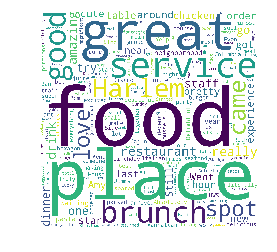

In [97]:
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Let's do a detailed comparison of local restaurants
I've saved a few reviews for each restaurant in four directories. We'll use the PlaintextCorpusReader to read these directories:
- PlaintextCorpusReader reads all matching files in a directory and saves them by file-ids

In [98]:
import nltk
from nltk.corpus import PlaintextCorpusReader

community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
heights_root = "data/heights"
heights_files = "heights.*"
amigos_root = "data/amigos"
amigos_files = "amigos.*"

community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
heights_data = PlaintextCorpusReader(heights_root,heights_files)
amigos_data = PlaintextCorpusReader(amigos_root,amigos_files)

In [99]:
amigos_data.fileids()

['amigos.1',
 'amigos.10',
 'amigos.11',
 'amigos.12',
 'amigos.13',
 'amigos.14',
 'amigos.15',
 'amigos.16',
 'amigos.17',
 'amigos.18',
 'amigos.19',
 'amigos.2',
 'amigos.20',
 'amigos.21',
 'amigos.3',
 'amigos.4',
 'amigos.5',
 'amigos.6',
 'amigos.7',
 'amigos.8',
 'amigos.9']

In [100]:
amigos_data.raw()

'I see all these bad reviews, but speaking for myself, I\'ve never gotten bad service here, or had a negative experience in the least--and I\'m here about once a week.\n\nThe atmosphere is fun and laid back, but not in a divey way. I\'ve never had a bad dish, although some are merely average; however, a few are A+: THE QUESADILLAS, the Queso Fundido, and the margaritas are among the best I\'ve ever had. The guacamole is above average.\n\nAlso, they have really great specials during the week--I believe one day is something like $21.95 for unlimited quesadillas + 5 margaritas? That sounds so impossible even as I type it but I\'m pretty sure that\'s correct\nMy friend and I decided to go out on Cinco de Mayo but we wanted something close to home with a nice vibe, people and good music and food. I remember a friend telling me about this place a while back. So I decided to make a reservation.  Not only did we get there and find that it was packed BUT the receptionist explained that since we

#### We need to modify comparitive_emotion_analyzer to tell it where the restaurant name and the text is in the tuple

In [101]:
def comparative_emotion_analyzer(text_tuples,name_location=1,text_location=1):
    print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
            "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
            "sadness","surprise"))
        
    for text_tuple in text_tuples:
        text = text_tuple[text_location] 
        result = emotion_analyzer(text)
        print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
            text_tuple[name_location][0:20],result['fear'],result['trust'],
              result['negative'],result['positive'],result['joy'],result['disgust'],
              result['anticipation'],result['sadness'],result['surprise']))
        
#And test it        
comparative_emotion_analyzer(all_snippets)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
Flat Top             0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Friedman's           0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
B2 Harlem            0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Hexagon Lounge       0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Amy Ruth's           0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Lolo's Seafood Shack 0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Clay                 0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Elma's               0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Grain House          0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Lido                 0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Arco Cafe            0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
BLVD Bistro          0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Shaking Crab - Upper 0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Max Soha             0.00	0.00	0.00	0.00	0.00	0.00	0.

In [102]:
restaurant_data = [('community',community_data.raw()),('le monde',le_monde_data.raw())
                  ,('heights',heights_data.raw()), ('amigos',amigos_data.raw())]
comparative_emotion_analyzer(restaurant_data,0,1)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
community            0.00	0.03	0.01	0.05	0.03	0.01	0.02	0.01	0.01
le monde             0.00	0.03	0.01	0.04	0.02	0.00	0.02	0.00	0.01
heights              0.00	0.03	0.01	0.04	0.03	0.00	0.03	0.01	0.01
amigos               0.01	0.03	0.01	0.04	0.03	0.01	0.02	0.01	0.01
